# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [3]:
# Study data files
MOUSE_METADATA_PATH = "data/Mouse_metadata.csv"
STUDY_RESULTS_PATH = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(MOUSE_METADATA_PATH)
print(mouse_metadata_df.shape)
mouse_metadata_df.head(3)

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [5]:
study_results_df = pd.read_csv(STUDY_RESULTS_PATH)
print(study_results_df.shape)
study_results_df.head(3)

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [6]:
# Combine the data into a single DataFrame
merge_df = pd.merge(study_results_df,mouse_metadata_df, on="Mouse ID")
# Display the data table for preview
print(merge_df.shape)
merge_df.head(3)

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [7]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Find duplicate rows on Mouse ID and Timepoint
duplicate_row_mask_series = merge_df.duplicated(["Mouse ID","Timepoint"], keep=False)

In [9]:
duplicate_row_df = merge_df[duplicate_row_mask_series]
duplicate_row_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Get the duplicate mouse ID(s)
bad_mouse_ids = duplicate_row_df["Mouse ID"].unique()
bad_mouse_ids

array(['g989'], dtype=object)

In [11]:
bad_mice_row_mask = merge_df["Mouse ID"].isin(bad_mouse_ids)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
all_data_bad_mouse_ids_df = merge_df[bad_mice_row_mask]
print(all_data_bad_mouse_ids_df.shape)
all_data_bad_mouse_ids_df

(13, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~bad_mice_row_mask]
print(clean_df.shape)
clean_df.head(3)

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [14]:
del merge_df

In [15]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = grouped_data.mean()
median = grouped_data.median()
variance = grouped_data.var()
std_dev = grouped_data.std()
sem_values = grouped_data.agg(sem)

In [112]:
# using another way to get the SEM without importing scipy SEM
clean_df.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [104]:
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem_values
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_funcs = {
    "Tumor Volume (mm3)": ["mean", "median", "var",	"std",	"sem"], 
    "Weight (g)": ["mean", "median"],
}
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg(agg_funcs)

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

             Weight (g)         
                   mean median  
Drug Regimen                    
Capomulin     19.965217   20.5  
Ceftamin      27.398876   28.0  
Infubinol     27.196629   27.0  
Ketapril      27.861702   28.0  
Naftisol      27.166667   27.0  
Placebo       27.928177   28.0  
Propriva      27.135135   26.0  
Ramicane      19.679825   19.0  
Stelasyn      27.856354   28.0  
Zoniferol     27.692308   28.0

## Bar and Pie Charts

In [172]:
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
timepoints_by_drug_s = clean_df.groupby("Drug Regimen").count()['Timepoint'].sort_values(ascending=False)
timepoints_by_drug_s

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

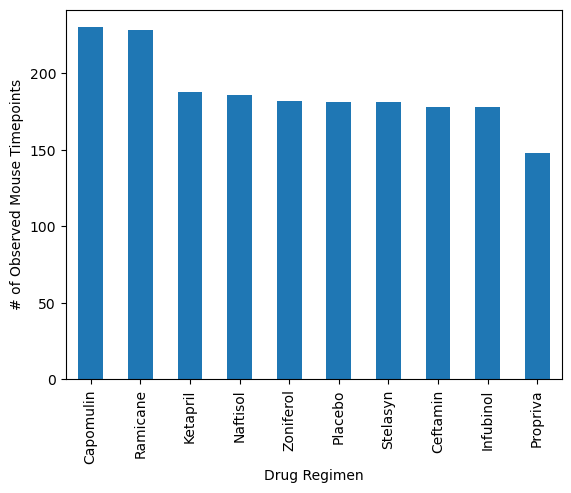

In [174]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_by_drug_s.plot.bar(ylabel="# of Observed Mouse Timepoints")
plt.show()

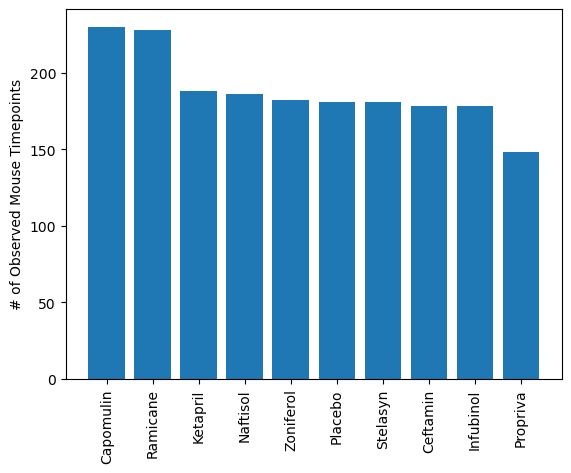

In [203]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoints_by_drug_s.index, timepoints_by_drug_s.values)
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


In [188]:
print(timepoints_by_drug_s)
print(timepoints_by_drug_s.index)
print(timepoints_by_drug_s.values)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64
Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')
[230 228 188 186 182 181 181 178 178 148]


In [239]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df.drop_duplicates(subset=['Mouse ID', 'Sex'])
gender_distribution = unique_mice['Sex'].value_counts()
gender_distribution

Sex
Male      125
Female    123
Name: count, dtype: int64

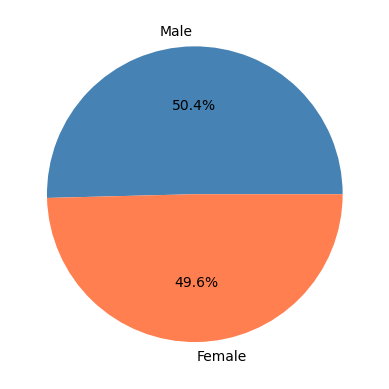

In [296]:
# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['steelblue', 'coral'])
plt.ylabel('')  # Remove the y-label
plt.show()

In [267]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender_df = {
    'Female': 123,
    'Male': 125
}
unique_mice_gender_df

{'Female': 123, 'Male': 125}

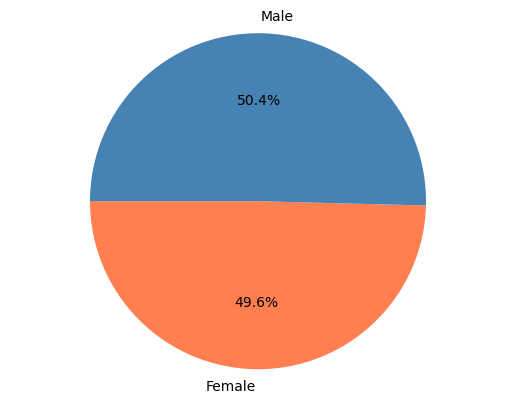

In [299]:
# Make the pie chart
labels = unique_mice_gender_df.keys()
sizes = unique_mice_gender_df.values()
colors = ['coral', 'steelblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

## Calculate the final tumor volume of each mouse across four of the promising treatment regimens:

In [46]:
clean_df['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [217]:
# Create a dataframe of only the last time point values for each mouse 
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_s = clean_df.groupby('Mouse ID').max()['Timepoint']
final_id_timepoint_df = pd.DataFrame(final_timepoint_s).reset_index()
#final_id_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# pd.merge(study_results_df,mouse_metadata_df, on="Mouse ID")
final_df = pd.merge(final_id_timepoint_df, clean_df, how='inner', on=["Mouse ID", "Timepoint"])
del final_timepoint_s, final_id_timepoint_df
print(final_df.shape)
final_df.head()

(248, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [343]:
# Put treatments into a list for for loop (and later for plot labels) (# Capomulin, Ramicane, Infubinol, and Ceftamin)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_for_plotting = []

In [454]:
# For each promising drug:
for treatment in promising_treatments:
    # Locate the rows which contain mice on this drug and get the tumor volumes (as a series)
    final_tumor_volumes = final_df.loc[final_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    print(final_tumor_volumes)
        # add the tumoor volume series to the tumor volume series list
    tumor_volumes_for_plotting.append(final_tumor_volumes)
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    # Calculate IQR
    IQR = Q3 - Q1
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify potential outliers
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")



19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3)

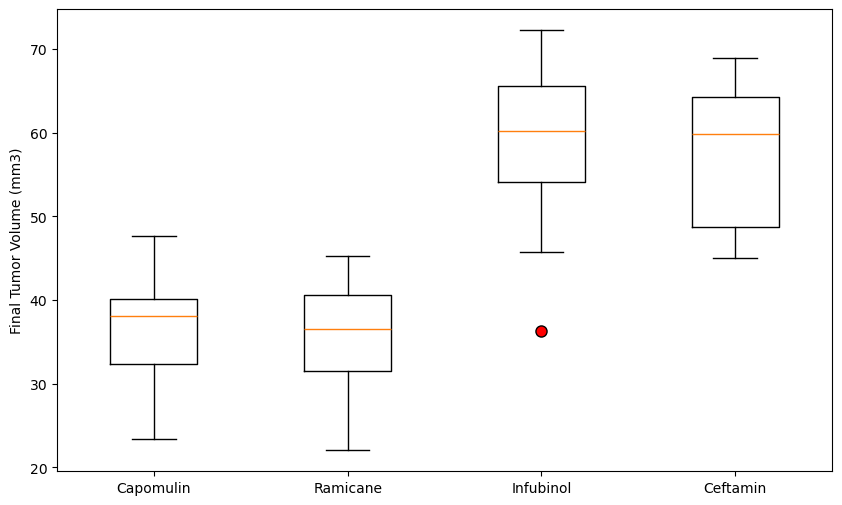

In [311]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volumes_for_plotting, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

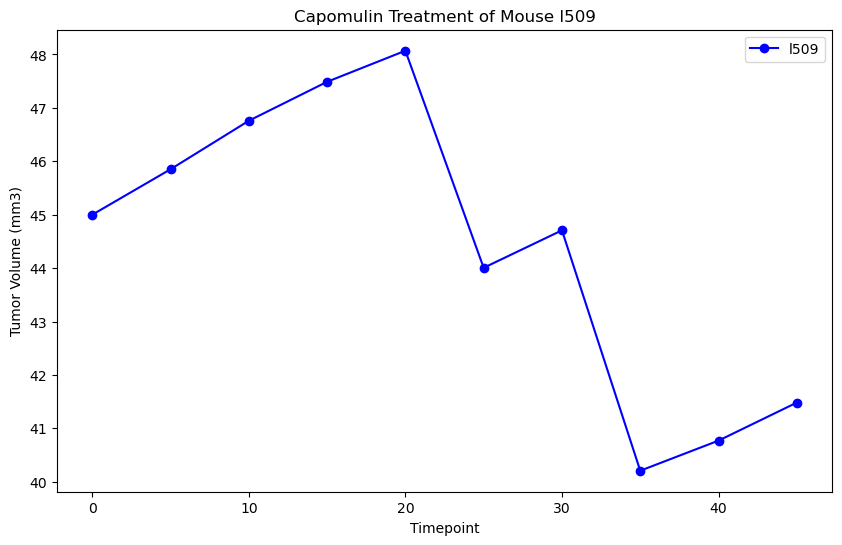

In [389]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'  # Replace 'Mouse_ID' with the actual ID of the mouse you want to plot
selected_mouse_data = clean_df[clean_df['Mouse ID'] == selected_mouse_id]

# Create a line plot showing tumor volume over time for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=selected_mouse_id)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse l509')
plt.legend()
plt.show()

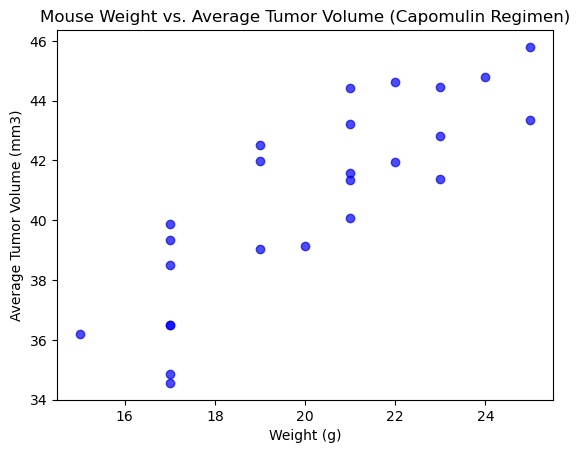

In [440]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
avg_df = capomulin_df.groupby('Mouse ID')[["Tumor Volume (mm3)", "Weight (g)"]].mean()
# Plot the scatter plot
plt.scatter(avg_df['Weight (g)'], avg_df['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


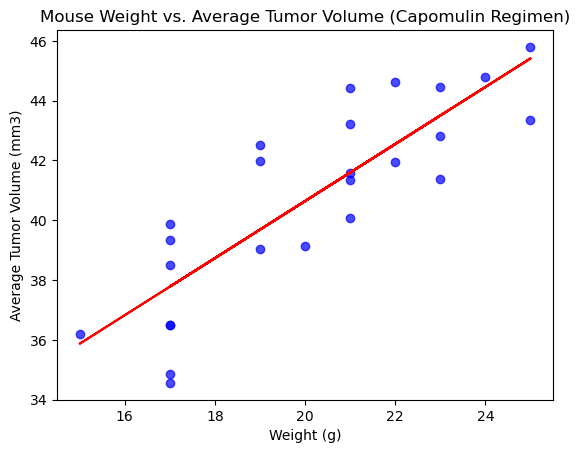

In [452]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
avg_df = capomulin_df.groupby('Mouse ID')[["Tumor Volume (mm3)", "Weight (g)"]].mean()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_df['Weight (g)'], avg_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value, 2)}")

# Plot the scatter plot
plt.scatter(avg_df['Weight (g)'], avg_df['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.plot(avg_df['Weight (g)'], slope * avg_df['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()